In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis


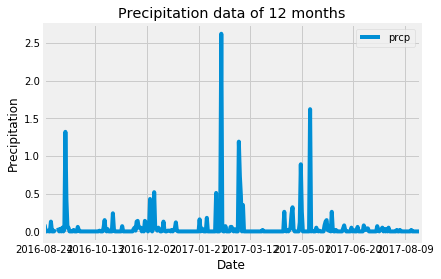

<Figure size 432x288 with 0 Axes>

In [18]:
# Design a query to retrieve the last 12 months of precipitation data 
# and plot the results

# query to retrieve the data and precipitation scores from 1 year ago
prec_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date > '2016-08-23').\
            group_by(Measurement.date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and 
# set the index to the date column
precp_df = pd.DataFrame(prec_data).set_index('date')

# Use Pandas Plotting with Matplotlib to plot the data
precp_plot = precp_df.plot()
precp_plot.set_xlabel("Date")
precp_plot.set_ylabel("Precipitation")
precp_plot.set_title("Precipitation data of 12 months")
plt.show()


In [11]:
# Use Pandas to print the summary statistics for the precipitation data.
precp_df.describe()

,prcp
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


In [12]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count()
print(station_count)

9


In [13]:
# List the stations and the counts in descending order.
station_list = session.query(Measurement.station, func.count(Measurement.station)).\
               group_by(Measurement.station).\
               order_by(func.count(Measurement.station).desc()).all()
station_list


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
most_active = station_list[0][0]
print(f"Most Active Station: {most_active}")

Most Active Station: USC00519281


In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp_record = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),\
                func.avg(Measurement.tobs)).\
                filter(Measurement.station == most_active).all()
temp_record

[(54.0, 85.0, 71.66378066378067)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station 
# and plot the results as a histogram

station_tobs = session.query(Measurement.tobs).\
              filter(Measurement.station == most_active, Measurement.date > '2016-08-23').all()
station_tobs

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

   tobs
0  77.0
1  80.0
2  80.0
3  75.0
4  73.0


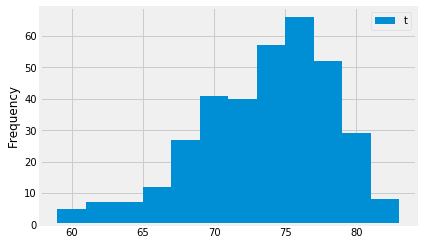

In [17]:
station_tobs_df = pd.DataFrame(station_tobs)
print(station_tobs_df.head())
plt.hist(station_tobs_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.legend("tobs", loc=1)
plt.show()